In [23]:
# Dependencies and setup
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

## Unemployment Data

In [24]:
# Import unemployment rate csv file, create DataFrame, and set index to Area Type
unemployment_data = Path('resources/Local_Area_Unemployment_Statistics__LAUS___Annual_Average.csv')
unemployment_df = pd.read_csv(unemployment_data)
unemployment_df = unemployment_df.set_index('Area Type')
unemployment_df

# Filter Area Type to only include County and State data and reduce columns
area_type_df = unemployment_df.loc[['State','County'],
                                   ['Area Name', 'Year', 'Labor Force', 'Employment', 'Unemployment','Unemployment Rate']]
area_type_df

# Filter Year to only include 2017-2022 and filter out California totals
recent_unemployment = area_type_df.loc[(area_type_df['Year'] > 2016) & 
                          (area_type_df['Area Name'] != 'California')]

# Rename Area Name column
recent_unemployment = recent_unemployment.rename(columns = {'Area Name': 'County'})

recent_unemployment


,County,Year,Labor Force,Employment,Unemployment,Unemployment Rate
Area Type,,,,,,
County,Alameda County,2017,838200,807100,31100,3.7
County,Alpine County,2017,550,510,30,6.2
County,Amador County,2017,14690,13960,740,5.0
County,Butte County,2017,102000,96100,5900,5.8
County,Calaveras County,2017,21020,20010,1000,4.8
...,...,...,...,...,...,...
County,Tulare County,2022,207500,190500,16900,8.2
County,Tuolumne County,2022,19880,18990,890,4.5
County,Ventura County,2022,413600,398400,15200,3.7


In [25]:
# Reduce Columns
recent_unemployment = recent_unemployment[['County', 'Year', 'Unemployment Rate']]
recent_unemployment

,County,Year,Unemployment Rate
Area Type,,,
County,Alameda County,2017,3.7
County,Alpine County,2017,6.2
County,Amador County,2017,5.0
County,Butte County,2017,5.8
County,Calaveras County,2017,4.8
...,...,...,...
County,Tulare County,2022,8.2
County,Tuolumne County,2022,4.5
County,Ventura County,2022,3.7


## Homeless Count Data

In [26]:
# Import age csv file and create DataFrame
age_data = Path('resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)
age_df

,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,18-24,15862
1,2017,All,California,25-34,28339
2,2017,All,California,35-44,25556
3,2017,All,California,45-54,27441
4,2017,All,California,55-64,23220
...,...,...,...,...,...
2136,2022,CA-614,San Luis Obispo County CoC,45-54,389
2137,2022,CA-614,San Luis Obispo County CoC,55-64,360
2138,2022,CA-614,San Luis Obispo County CoC,65+,174
2139,2022,CA-614,San Luis Obispo County CoC,Under 18,742


In [27]:
# Create clean DataFrame by dropping rows with '*' in count column
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT']!='*']
clean_age_df

,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,18-24,15862
1,2017,All,California,25-34,28339
2,2017,All,California,35-44,25556
3,2017,All,California,45-54,27441
4,2017,All,California,55-64,23220
...,...,...,...,...,...
2136,2022,CA-614,San Luis Obispo County CoC,45-54,389
2137,2022,CA-614,San Luis Obispo County CoC,55-64,360
2138,2022,CA-614,San Luis Obispo County CoC,65+,174
2139,2022,CA-614,San Luis Obispo County CoC,Under 18,742


In [28]:
# Find all Continuums of Care in Los Angeles County
la_county_coc = clean_age_df.loc[clean_age_df["COC_NAME"].str.contains("Los Angeles County", case = False)]
la_county_coc

,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
244,2017,CA-600,Los Angeles County CoC,18-24,6040
245,2017,CA-600,Los Angeles County CoC,25-34,9236
246,2017,CA-600,Los Angeles County CoC,35-44,8201
247,2017,CA-600,Los Angeles County CoC,45-54,9235
248,2017,CA-600,Los Angeles County CoC,55-64,7642
...,...,...,...,...,...
2119,2022,CA-612,Glendale CoC (Los Angeles County),35-44,103
2120,2022,CA-612,Glendale CoC (Los Angeles County),45-54,113
2121,2022,CA-612,Glendale CoC (Los Angeles County),55-64,149
2122,2022,CA-612,Glendale CoC (Los Angeles County),65+,93


In [29]:
# Use replace to group all of the Los Angeles County CoCs
cocs_to_replace = ["Glendale CoC (Los Angeles County)",
                   "Pasadena CoC (Los Angeles County)", 
                   "Long Beach CoC (Los Angeles County)"
                  ]
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].replace(cocs_to_replace, "Los Angeles County CoC")
clean_age_df.head()

C:\Users\mattcalvert\AppData\Local\Temp\ipykernel_13944\2570887098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].replace(cocs_to_replace, "Los Angeles County CoC")


,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,18-24,15862
1,2017,All,California,25-34,28339
2,2017,All,California,35-44,25556
3,2017,All,California,45-54,27441
4,2017,All,California,55-64,23220


In [30]:
# Change homeless count data type to integer
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()
total_homeless_count

C:\Users\mattcalvert\AppData\Local\Temp\ipykernel_13944\2318218614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)


,CALENDAR_YEAR,COC_NAME,EXPERIENCING_HOMELESSNESS_CNT
0,2017,Alameda County CoC,6713
1,2017,"Alpine, Inyo, Mono Counties CoC",151
2,2017,"Amador, Calaveras, Mariposa, Tuolumne Counties...",368
3,2017,Butte County CoC,1400
4,2017,California,184234
...,...,...,...
245,2022,Stanislaus County CoC,6482
246,2022,Tehama County CoC,670
247,2022,Ventura County CoC,2919
248,2022,Yolo County CoC,1419


In [31]:
# Rename CALENDAR_YEAR column
total_homeless_count = total_homeless_count.rename(columns = {'CALENDAR_YEAR': 'Year'})
total_homeless_count

,Year,COC_NAME,EXPERIENCING_HOMELESSNESS_CNT
0,2017,Alameda County CoC,6713
1,2017,"Alpine, Inyo, Mono Counties CoC",151
2,2017,"Amador, Calaveras, Mariposa, Tuolumne Counties...",368
3,2017,Butte County CoC,1400
4,2017,California,184234
...,...,...,...
245,2022,Stanislaus County CoC,6482
246,2022,Tehama County CoC,670
247,2022,Ventura County CoC,2919
248,2022,Yolo County CoC,1419


## Population Data

In [32]:
# Import california population csv file and create DataFrame
population_data = Path('resources/california_population.csv')
population_df = pd.read_csv(population_data)
population_df.head()

,COUNTY,Year,Total Population,Total Housing Units,Single Detached,Single Attached,Two to Four,Five Plus,Mobile Homes,Occupied,Vacancy Rate,Persons per Household
0,Alameda,2017,"1,644,303","596,937","315,395","46,333","65,721","161,630","7,858","564,303",5.50%,2.84
1,Alpine,2017,"1,161","1,780","1,052",18,45,631,34,483,72.90%,2.35
2,Amador,2017,"36,900","18,189","14,905",570,605,690,"1,419","15,140",16.80%,2.18
3,Butte,2017,"225,468","98,871","61,689","3,112","8,976","10,855","14,239","90,791",8.20%,2.42
4,Calaveras,2017,"45,170","27,908","24,256",366,676,392,"2,218","18,371",34.20%,2.43


In [33]:
# Reduce columns to just county, year, and total population
population_df = population_df[['COUNTY','Year','Total Population']]

# Rename COUNTY column
population_df = population_df.rename(columns = {'COUNTY': 'County'})

#Filter out California
population_df = population_df.loc[population_df['County'] != 'California']

#add 'County' to the county names
population_df['County'] = population_df['County'] + ' County'

# Remove "," from Total Population
population_df['Total Population'] = population_df['Total Population'].str.replace(',','')

# Change Total Population data type to integer
population_df['Total Population'] = population_df['Total Population'].astype(int)
population_df

,County,Year,Total Population
0,Alameda County,2017,1644303
1,Alpine County,2017,1161
2,Amador County,2017,36900
3,Butte County,2017,225468
4,Calaveras County,2017,45170
...,...,...,...
348,Tulare County,2022,474507
349,Tuolumne County,2022,54465
350,Ventura County,2022,831533
351,Yolo County,2022,221639


In [34]:
# Import coc mapping csv file and create DataFrame
coc_data = Path('resources/County-CoC Mapping.csv')
coc_df = pd.read_csv(coc_data)

# Rename Continuum of Care column to COC_NAME
coc_df = coc_df.rename(columns = {'Continuum of Care': 'COC_NAME'})

coc_df.head()

,County,COC_NAME
0,Alameda County,Alameda County CoC
1,Alpine County,"Alpine, Inyo, Mono Counties CoC"
2,Inyo County,"Alpine, Inyo, Mono Counties CoC"
3,Mono County,"Alpine, Inyo, Mono Counties CoC"
4,Amador County,"Amador, Calaveras, Mariposa, Tuolumne Counties..."


In [35]:
# Merge population DF and coc DF on County
population_coc = pd.merge(population_df, coc_df, on='County',how = 'left')

# Group by year and COC Name and sum total population
population_coc_grouped = population_coc.groupby(['Year', 'COC_NAME'])['Total Population'].sum().reset_index()
population_coc_grouped

,Year,COC_NAME,Total Population
0,2017,Alameda County CoC,1644303
1,2017,"Alpine, Inyo, Mono Counties CoC",33350
2,2017,"Amador, Calaveras, Mariposa, Tuolumne Counties...",154922
3,2017,Butte County CoC,225468
4,2017,"Colusa, Glenn, Trinity Counties CoC",63889
...,...,...,...
235,2022,Stanislaus County CoC,548719
236,2022,Tehama County CoC,64907
237,2022,Ventura County CoC,831533
238,2022,Yolo County CoC,221639


In [36]:
# Merge recent unemployment DF and coc DF on county
unemployment_coc = pd.merge(recent_unemployment, coc_df, on='County',how = 'left')

# Group by year and COC Name and average unemployment rate
unemployment_coc_grouped = unemployment_coc.groupby(['Year', 'COC_NAME'])['Unemployment Rate'].mean().reset_index()
unemployment_coc_grouped

,Year,COC_NAME,Unemployment Rate
0,2017,Alameda County CoC,3.700000
1,2017,"Alpine, Inyo, Mono Counties CoC",5.033333
2,2017,"Amador, Calaveras, Mariposa, Tuolumne Counties...",5.275000
3,2017,Butte County CoC,5.800000
4,2017,"Colusa, Glenn, Trinity Counties CoC",9.333333
...,...,...,...
235,2022,Stanislaus County CoC,5.400000
236,2022,Tehama County CoC,4.800000
237,2022,Ventura County CoC,3.700000
238,2022,Yolo County CoC,4.000000


In [37]:
# Merge pop_coc_reduced and total_homeless_count
total_pop_homeless = pd.merge(population_coc_grouped, total_homeless_count, on=['COC_NAME','Year'],how = 'left')

# Reorder columns
total_pop_homeless = total_pop_homeless[['COC_NAME', 'Year', 'Total Population', 'EXPERIENCING_HOMELESSNESS_CNT']]

#Calculate homeless rate
total_pop_homeless['Homeless Rate'] = (total_pop_homeless['EXPERIENCING_HOMELESSNESS_CNT'] / total_pop_homeless['Total Population']) * 100

total_pop_homeless

,COC_NAME,Year,Total Population,EXPERIENCING_HOMELESSNESS_CNT,Homeless Rate
0,Alameda County CoC,2017,1644303,6713.0,0.408258
1,"Alpine, Inyo, Mono Counties CoC",2017,33350,151.0,0.452774
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",2017,154922,368.0,0.237539
3,Butte County CoC,2017,225468,1400.0,0.620931
4,"Colusa, Glenn, Trinity Counties CoC",2017,63889,190.0,0.297391
...,...,...,...,...,...
235,Stanislaus County CoC,2022,548719,6482.0,1.181297
236,Tehama County CoC,2022,64907,670.0,1.032246
237,Ventura County CoC,2022,831533,2919.0,0.351038
238,Yolo County CoC,2022,221639,1419.0,0.640230


In [38]:
# Merge pop_coc_reduced and total_homeless_count
final_df = pd.merge(total_pop_homeless, unemployment_coc_grouped, on=['COC_NAME','Year'],how = 'left').dropna()
final_df

,COC_NAME,Year,Total Population,EXPERIENCING_HOMELESSNESS_CNT,Homeless Rate,Unemployment Rate
0,Alameda County CoC,2017,1644303,6713.0,0.408258,3.700000
1,"Alpine, Inyo, Mono Counties CoC",2017,33350,151.0,0.452774,5.033333
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",2017,154922,368.0,0.237539,5.275000
3,Butte County CoC,2017,225468,1400.0,0.620931,5.800000
4,"Colusa, Glenn, Trinity Counties CoC",2017,63889,190.0,0.297391,9.333333
...,...,...,...,...,...,...
235,Stanislaus County CoC,2022,548719,6482.0,1.181297,5.400000
236,Tehama County CoC,2022,64907,670.0,1.032246,4.800000
237,Ventura County CoC,2022,831533,2919.0,0.351038,3.700000
238,Yolo County CoC,2022,221639,1419.0,0.640230,4.000000


In [39]:
# Rename columns
final_df = final_df.rename(columns = {'COC_NAME': 'COC Name', 'EXPERIENCING_HOMELESSNESS_CNT':'Homeless Count'})
final_df.head()

,COC Name,Year,Total Population,Homeless Count,Homeless Rate,Unemployment Rate
0,Alameda County CoC,2017,1644303,6713.0,0.408258,3.700000
1,"Alpine, Inyo, Mono Counties CoC",2017,33350,151.0,0.452774,5.033333
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",2017,154922,368.0,0.237539,5.275000
3,Butte County CoC,2017,225468,1400.0,0.620931,5.800000
4,"Colusa, Glenn, Trinity Counties CoC",2017,63889,190.0,0.297391,9.333333


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of homeless rate for each county
mean_homeless_rate = np.mean(final_df['Homeless Rate'])
print(mean_homeless_rate)

median_homeless_rate = np.median(final_df['Homeless Rate'])
print(median_homeless_rate)

mode_homeless_rate = st.mode(final_df['Homeless Rate'])
print(mode_homeless_rate)

0.6303024792406225
0.603652593933816
ModeResult(mode=array([0.00778188]), count=array([1]))


C:\Users\mattcalvert\AppData\Local\Temp\ipykernel_13944\971125914.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_homeless_rate = st.mode(final_df['Homeless Rate'])


In [41]:
# Sort Homeless rate in descending order and show the top,10
homeless_rate_sort = final_df.sort_values(by='Homeless Rate',ascending=False)

In [42]:
# Filter for 2022 only
homeless_rate_2022 = homeless_rate_sort.loc[homeless_rate_sort['Year'] == 2022].iloc[:10]
homeless_rate_2022

,COC Name,Year,Total Population,Homeless Count,Homeless Rate,Unemployment Rate
216,Merced County CoC,2022,284130,5469.0,1.924823,7.70
208,Humboldt County CoC,2022,134528,2572.0,1.911870,4.00
215,Mendocino County CoC,2022,89629,1628.0,1.816376,4.10
239,"Yuba, Sutter Counties CoC",2022,181283,2608.0,1.438635,6.05
203,Butte County CoC,2022,206582,2601.0,1.259064,4.50
226,San Joaquin County CoC,2022,782811,9505.0,1.214214,5.20
235,Stanislaus County CoC,2022,548719,6482.0,1.181297,5.40
209,Imperial County CoC,2022,178845,1857.0,1.038329,14.70
227,San Luis Obispo County CoC,2022,279751,2888.0,1.032347,3.00
236,Tehama County CoC,2022,64907,670.0,1.032246,4.80


In [43]:
# Sort Homeless count in descending order and show the top,10
homeless_count_sort = final_df.sort_values(by='Homeless Count',ascending=False)

In [44]:
# Filter for 2022 only
homeless_count_2022 = homeless_count_sort.loc[homeless_count_sort['Year'] == 2022].iloc[:10]
homeless_count_2022

,COC Name,Year,Total Population,Homeless Count,Homeless Rate,Unemployment Rate
213,Los Angeles County CoC,2022,9834503,100774.0,1.024698,4.9
225,San Diego County CoC,2022,3275435,25621.0,0.782217,3.4
220,Orange County CoC,2022,3151946,23225.0,0.736846,3.2
230,Santa Clara County CoC,2022,1890967,17127.0,0.905727,2.6
223,Sacramento County CoC,2022,1573366,11728.0,0.745408,3.9
200,Alameda County CoC,2022,1644248,11628.0,0.707193,3.3
224,San Bernardino County CoC,2022,2180777,10416.0,0.477628,4.1
222,Riverside County CoC,2022,2430976,10061.0,0.413867,4.2
226,San Joaquin County CoC,2022,782811,9505.0,1.214214,5.2
210,Kern County CoC,2022,908107,8728.0,0.961120,6.9


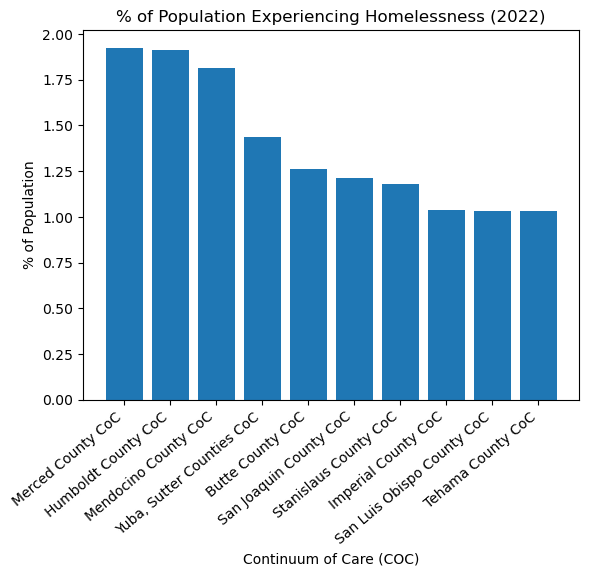

In [45]:
# Generate a bar plot showing the top 10 continuums of care by homeless rate
x_axis = homeless_rate_2022['COC Name']
y_axis = homeless_rate_2022['Homeless Rate']

plt.bar(x_axis,y_axis, color='tab:blue')

plt.xlabel("Continuum of Care (COC)")
plt.ylabel("% of Population")
plt.xticks(rotation=40, ha = 'right')
plt.title('% of Population Experiencing Homelessness (2022)')
plt.show()

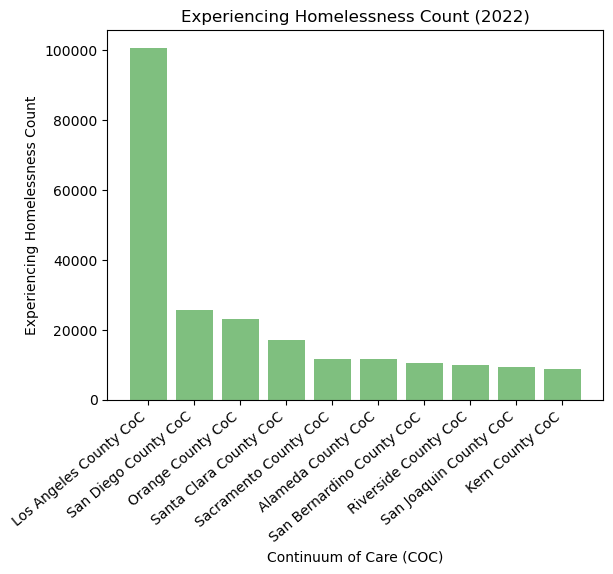

In [46]:
# Generate a bar plot showing the top 10 continuums of care by homeless count
x_axis = homeless_count_2022['COC Name']
y_axis = homeless_count_2022['Homeless Count']

plt.bar(x_axis,y_axis,color='g', alpha= 0.5)

plt.xlabel("Continuum of Care (COC)")
plt.ylabel("Experiencing Homelessness Count")
plt.xticks(rotation=40, ha = 'right')
plt.title('Experiencing Homelessness Count (2022)')
plt.show()

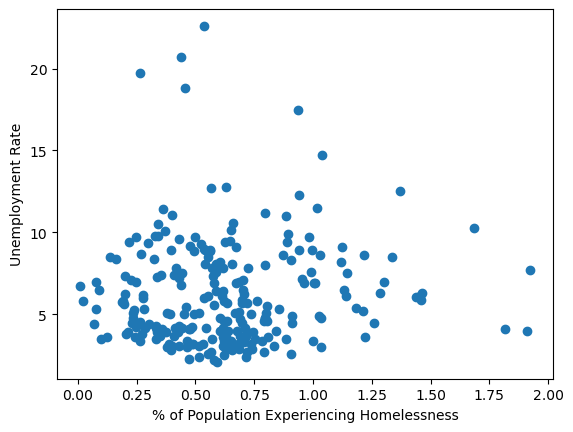

In [47]:
scatter_df = final_df

x_axis=scatter_df['Homeless Rate']
y_axis=scatter_df['Unemployment Rate']
plt.scatter(x_axis,y_axis)
plt.xlabel("% of Population Experiencing Homelessness")
plt.ylabel("Unemployment Rate")
plt.show()

The correlation between homeless rate and unemployment rate is 0.06


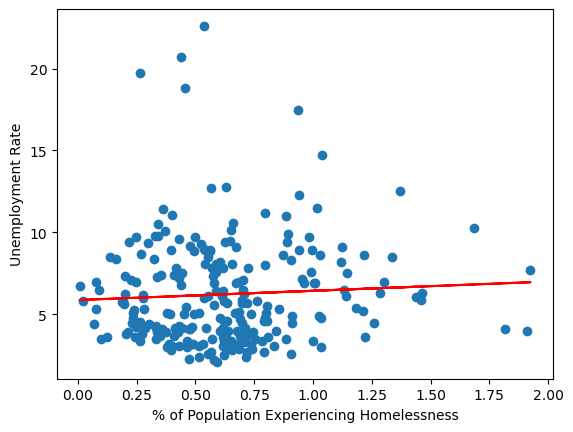

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for homeless rate and unemployment rate for all counties 2017-2022

print(f"The correlation between homeless rate and unemployment rate is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.scatter(x_axis,y_axis,color='navy',alpha=0)
plt.xlabel("% of Population Experiencing Homelessness")
plt.ylabel("Unemployment Rate")

plt.show()